In [212]:
import pandas as pd #libreria de analisis de datos y herramientas de manipulación
import matplotlib.pyplot as plt #libreria para generacion de graficos
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
from scipy import stats

In [213]:
mba="SegmentationData.csv"

#ubicacion de datos y notebook en mismo directorio
df_mba = pd.read_csv(mba)


Estudio base de datos SegmentacionData.csv
Cluster Jerárquico para k=4 


---

In [243]:
df_mba.head(5)

,ID,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice
0,1,10,20,35,5,20,10,MBA,Lexus
1,2,25,5,25,5,25,15,MBA,BMW
2,3,10,20,30,10,10,20,MBA,Lexus
3,4,10,15,30,10,20,15,MBA,BMW
4,5,20,10,40,1,14,15,MBA,Mercedes


In [244]:
df_mba = df_mba.drop("ID",axis=1) #eliminar columna ID
para_cluster = df_mba.iloc[:,:6] #puntajes features de acuerdo al entrevistado
mba_ = df_mba.iloc[:,6] #estudios
choice_ = df_mba.iloc[:,7] #estudios

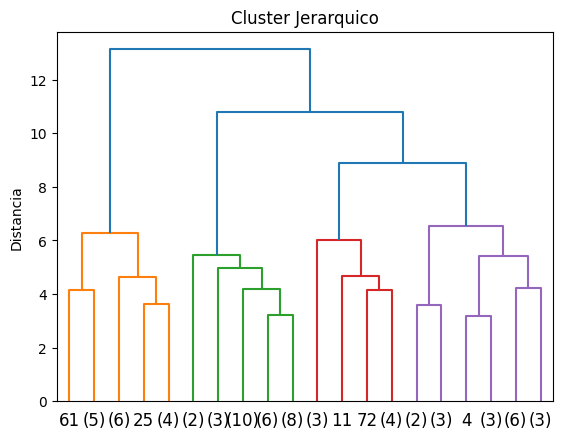

In [245]:
#Estandarización {promedio = 0 y desviación std. = 1}
scaler = StandardScaler()
new_scaled = scaler.fit_transform(para_cluster)
new_scaled = pd.DataFrame(new_scaled, columns = para_cluster.columns)
#Criterio distancias para cluster
link = linkage(new_scaled, 'ward')
#Dendograma para k = 4
dendrograma = dendrogram(link, p=20,truncate_mode="lastp", color_threshold=8) #corte distancia 8 para 4 clusters
plt.title("Cluster Jerarquico")
plt.ylabel("Distancia")
plt.show()

In [246]:
labels = fcluster(link, 8, criterion='distance')
new_scaled["Cluster"] = labels
new_scaled.groupby(["Cluster"]).mean()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
Cluster,,,,,,
1,1.155191,0.861136,-0.661150,0.164594,-0.925642,-0.702773
2,-0.015888,-0.427848,-0.283534,0.503985,-0.099608,0.590267
3,-1.116719,1.128926,-0.052305,-0.030368,0.750728,-0.748559
4,-0.507057,-0.688448,1.107377,-0.952241,0.659334,0.087023


* **CLUSTER 1 "TENDENCIAS"**: Le interesa un auto en tendencias, moderno y con estilo, sacrificando su rendimiento y comodidad.
* **CLUSTER 2 "COMODIDAD"**: Le interesa un auto Cómodo y Deportivo, sacrificando el estilo.
* **CLUSTER 3 "CLÁSICOS"**: Le interesa la Performance, pero sobre todo un auto con Estilo que no esté en las tendencias.
* **CLUSTER 4 "CALIDAD"**: Le interesa un auto seguro y de confianza, con buen rendimiento, sacrificando los estilo deportivos.


In [247]:
names = {1:"Tendencias", 2:"Comodidad", 3:"Clásicos" , 4:"Calidad"} 
df_mba["Cluster"] = labels
df_mba = df_mba.replace({"Cluster": names})

In [248]:
df_mba.head(10) #Agregado el cluster al df

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice,Cluster
0,10,20,35,5,20,10,MBA,Lexus,Calidad
1,25,5,25,5,25,15,MBA,BMW,Calidad
2,10,20,30,10,10,20,MBA,Lexus,Comodidad
3,10,15,30,10,20,15,MBA,BMW,Calidad
4,20,10,40,1,14,15,MBA,Mercedes,Calidad
5,20,30,10,20,10,10,MBA,Lexus,Tendencias
6,10,13,20,17,25,15,MBA,Lexus,Comodidad
7,15,10,35,10,25,5,MBA,Lexus,Calidad
8,1,13,25,1,35,25,MBA,Lexus,Calidad
9,15,20,20,10,25,10,MBA,BMW,Clásicos


#### MBA vs Choice

In [249]:
tabla=pd.crosstab(df_mba.MBA, df_mba.Choice, margins=False)
tabla

Choice,BMW,Lexus,Mercedes
MBA,,,
MBA,11,10,3
Undergrad,21,12,16


In [250]:
f_obs = np.array([tabla.iloc[0][:].values,
                 tabla.iloc[1][:].values])
#IMPRIME TABLA DE VALORES ESPERADOS
print(stats.chi2_contingency(f_obs)[3])                        

[[10.52054795  7.23287671  6.24657534]
 [21.47945205 14.76712329 12.75342466]]


In [251]:
#P-VALOR SEGÚN TEST DE X2
stats.chi2_contingency(f_obs)[1]

0.12722919037384012

Dado que p-valor es > 0.05, por test de X2:

**No es posible afirmar de forma estadística, con un 5% de significancia, que existe una relación entre MBA y las marcas escogidas.**

---


#### MBA vs Clusters

In [252]:
tabla=pd.crosstab(df_mba.MBA, df_mba.Cluster, margins=False)
tabla

Cluster,Calidad,Clásicos,Comodidad,Tendencias
MBA,,,,
MBA,12,2,6,4
Undergrad,6,7,23,13


In [253]:
f_obs = np.array([tabla.iloc[0][:].values,
                 tabla.iloc[1][:].values])
#IMPRIME TABLA DE VALORES ESPERADOS
print(stats.chi2_contingency(f_obs)[3])    

[[ 5.91780822  2.95890411  9.53424658  5.5890411 ]
 [12.08219178  6.04109589 19.46575342 11.4109589 ]]


In [254]:
#P-VALOR SEGÚN TEST DE X2
stats.chi2_contingency(f_obs)[1]

0.006129163115297634

Dado que p-valor es < 0.05, por test de X2 se puede afirmar que: 

**Las variables MBA y los clusters encontrados se encuentran asociadas estadísticamente, con un 5% de significancia.**

---

#### Choice vs Clusters

In [255]:
#tabla principal 
tabla=pd.crosstab(df_mba.Choice, df_mba.Cluster, margins=False)
tabla

Cluster,Calidad,Clásicos,Comodidad,Tendencias
Choice,,,,
BMW,8,6,10,8
Lexus,9,0,8,5
Mercedes,1,3,11,4


In [256]:
f_obs = np.array([tabla.iloc[0][:].values,
                 tabla.iloc[1][:].values,
                 tabla.iloc[2][:].values])
#IMPRIME TABLA DE VALORES ESPERADOS
print(stats.chi2_contingency(f_obs)[3])    

[[ 7.89041096  3.94520548 12.71232877  7.45205479]
 [ 5.42465753  2.71232877  8.73972603  5.12328767]
 [ 4.68493151  2.34246575  7.54794521  4.42465753]]


In [257]:
#P-VALOR SEGÚN TEST DE X2
stats.chi2_contingency(f_obs)[1]


0.07337590005340149

Dado que p-valor es > 0.05:

**No es posible afirmar de forma estadística, con un 5% de significancia, que existe una relación entre Choice y los cluster encontrados**

---

* Con un riesgo mayor al 7.5%, si se podría considerar que estas variables están estadísticamente relacionadas.
* Es posible repetir el análisis con el grupo MBA y Ungraded por separado, o incluir esa condición binaria como feature.

In [258]:
para_cluster2 = df_mba.iloc[:,:7] #puntajes features de acuerdo al entrevistado
para_cluster2.replace({'MBA':1, 'Undergrad' : 0}, inplace=True)

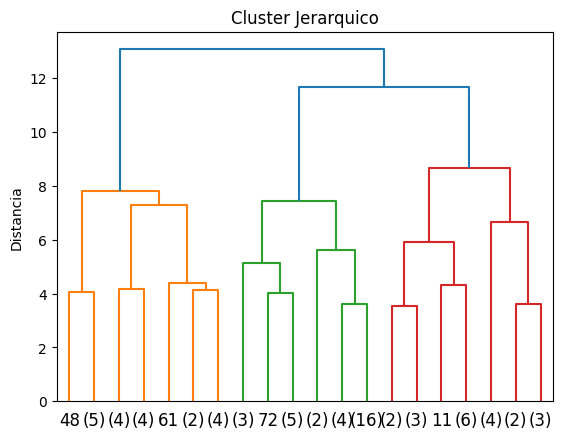

In [259]:
#Estandarización {promedio = 0 y desviación std. = 1}
scaler = StandardScaler()
new_scaled = scaler.fit_transform(para_cluster2)
new_scaled = pd.DataFrame(new_scaled, columns = para_cluster2.columns)
#Criterio distancias para cluster
link = linkage(new_scaled, 'ward')
#Dendograma para k = 3
dendrograma = dendrogram(link, p=20,truncate_mode="lastp", color_threshold=9) #corte distancia 9 para 3 clusters
plt.title("Cluster Jerarquico")
plt.ylabel("Distancia")
plt.show()

In [260]:
labels = fcluster(link, 9, criterion='distance')
new_scaled["Cluster"] = labels
new_scaled.groupby(["Cluster"]).mean()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA
Cluster,,,,,,,
1,0.498489,1.139208,-0.575233,0.098192,-0.554900,-0.673340,-0.497119
2,0.000441,-0.582226,-0.196343,0.077254,0.346558,0.466968,-0.562517
3,-0.499140,-0.279731,0.865072,-0.212234,0.043315,-0.015994,1.327501


* **CLUSTER 1 "ESTILO"**: Destaca sobre todo en preferir el estilo. Prefiere tendencia sobre rendimiento y confianza.
* **CLUSTER 2 "MEDIA"**: Le interesa rendimiento y comodida en justa medida. Grupo de variada opinión y menos interés en el estilo.
* **CLUSTER 3 "CONFIANZA"**: Concentra mayoritariamente al conjunto de egresados MBA. Especial preferencia por confianza sacrificando tendencia.


In [261]:
names = {1:"Estilo", 2:"Media", 3:"Confianza"} 
df_mba = pd.read_csv(mba)
df_mba["Cluster"] = labels
df_mba = df_mba.replace({"Cluster": names})
df_mba.drop('ID',axis=1,inplace=True)

In [262]:
df_mba.head(5)

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice,Cluster
0,10,20,35,5,20,10,MBA,Lexus,Confianza
1,25,5,25,5,25,15,MBA,BMW,Media
2,10,20,30,10,10,20,MBA,Lexus,Confianza
3,10,15,30,10,20,15,MBA,BMW,Confianza
4,20,10,40,1,14,15,MBA,Mercedes,Confianza


In [263]:
#tabla principal 
tabla=pd.crosstab(df_mba.Choice, df_mba.Cluster, margins=False)
tabla

Cluster,Confianza,Estilo,Media
Choice,,,
BMW,9,10,13
Lexus,10,5,7
Mercedes,2,6,11


In [264]:
f_obs = np.array([tabla.iloc[0][:].values,
                 tabla.iloc[1][:].values,
                 tabla.iloc[2][:].values])
#IMPRIME TABLA DE VALORES ESPERADOS
print(stats.chi2_contingency(f_obs)[3])    

[[ 9.20547945  9.20547945 13.5890411 ]
 [ 6.32876712  6.32876712  9.34246575]
 [ 5.46575342  5.46575342  8.06849315]]


In [265]:
#P-VALOR SEGÚN TEST DE X2
stats.chi2_contingency(f_obs)[1]

0.17057977255851842

Dado que p-valor es > 0.05:

**No es posible afirmar de forma estadística, con un 5% de significancia, que existe una relación entre Choice y los cluster encontrados**

----
* Añadir a los grupos MBA y Undergrad como feature a la segmentación no genera mayor correlación entre Choice y los Cluster